# Classification automatique

In [32]:
# import des données

import pandas as pd
import numpy as np
import seaborn as sn
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

heart_attack = pd.read_csv("Heart Attack Data Set.csv")
heart_attack

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
X = heart_attack.drop(columns=["target"])
y = heart_attack["target"]


## Régression logistique

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_train_pred = log_reg.predict(X_train)

print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


Train Accuracy:  0.8679245283018868
Accuracy:  0.8131868131868132


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'Vraie classe')

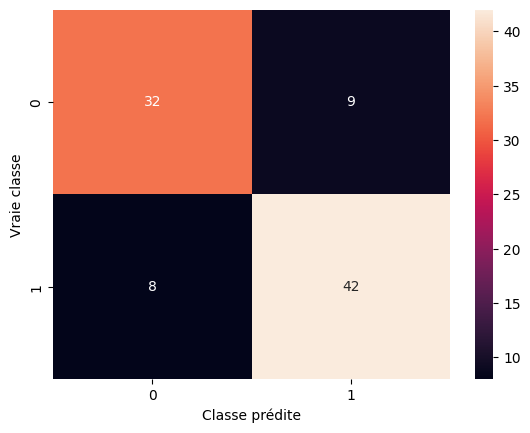

In [35]:
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)
sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.xlabel("Classe prédite")
plt.ylabel("Vraie classe")

In [36]:
scores = cross_val_score(log_reg,X_train, y_train, cv=None, scoring='roc_auc')
scores1 = cross_val_score(log_reg,X_train, y_train, cv=None, scoring='recall')
print("Moyenne ROC AUC :", scores.mean(), "\nMoyenne recall :", scores1.mean())


Moyenne ROC AUC : 0.9072768878718536 
Moyenne recall : 0.8608695652173914


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

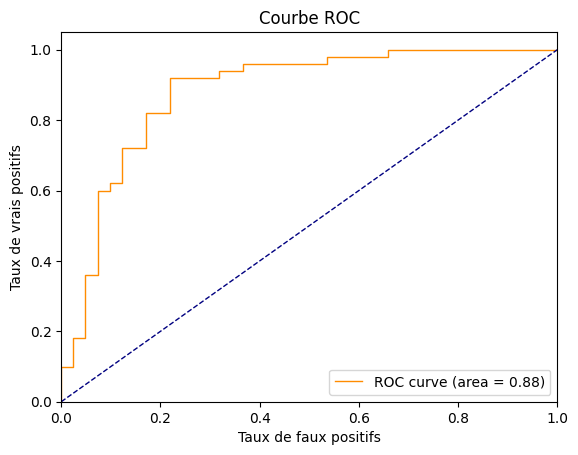

In [37]:
# Afficher la courbe ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

### Régression logistique quadratique

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_train_poly, y_train)

y_test_pred_poly = log_reg_poly.predict(X_test_poly)
y_train_pred = log_reg_poly.predict(X_train_poly)
# Confusion matrix
confusion_matrix(y_test, y_test_pred_poly)

# Accuracy
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred_poly))

Accuracy:  0.8679245283018868
Accuracy:  0.7912087912087912


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


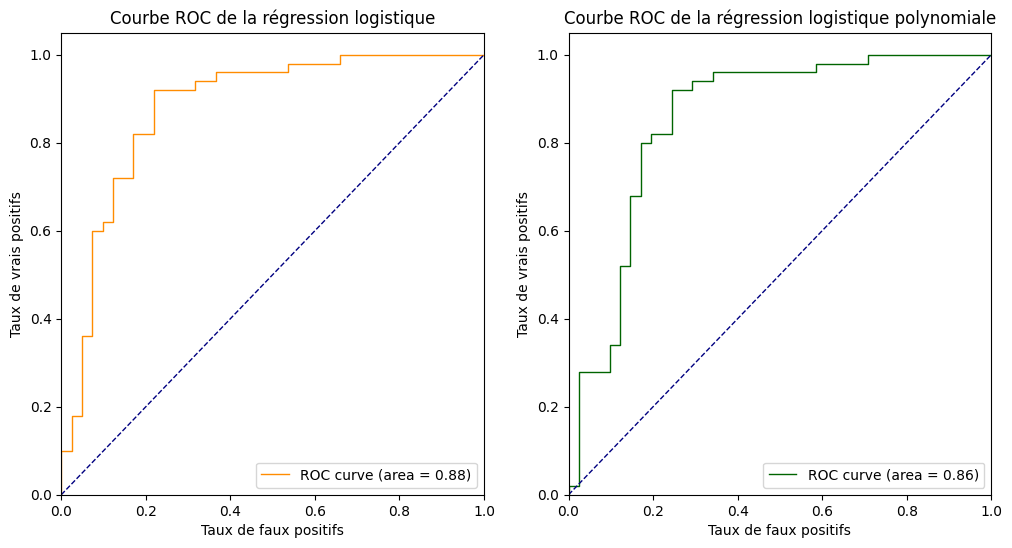

In [39]:
# Courbe ROC

y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

y_pred_proba_poly = log_reg_poly.predict_proba(X_test_poly)[:,1]
fpr_poly, tpr_poly, thresholds = roc_curve(y_test, y_pred_proba_poly)
roc_auc_poly = auc(fpr_poly, tpr_poly)

# Create 2 subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC de la régression logistique')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_poly, tpr_poly, color='darkgreen', lw=1, label='ROC curve (area = %0.2f)' % roc_auc_poly)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC de la régression logistique polynomiale')
plt.legend(loc="lower right")




## KNN

Meilleur nombre de voisins:  12
Meilleur score:  0.6601092896174864


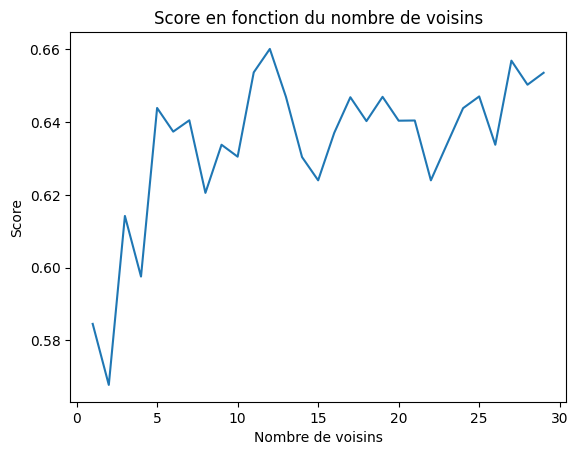

In [40]:
# Grid Search du meilleur nombre de voisins

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": range(1, 30)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print("Meilleur nombre de voisins: ", grid_search.best_params_["n_neighbors"])
print("Meilleur score: ", grid_search.best_score_)

# Affichage du score en fonction du nombre de voisins

scores = grid_search.cv_results_["mean_test_score"]
plt.plot(range(1, 30), scores)
plt.xlabel("Nombre de voisins")
plt.ylabel("Score")
plt.title("Score en fonction du nombre de voisins")
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_["n_neighbors"])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.6593406593406593


array([[27, 14],
       [17, 33]], dtype=int64)

In [42]:

scores = cross_val_score(knn,X_train, y_train, cv=None, scoring='roc_auc')
scores1 = cross_val_score(knn,X_train, y_train, cv=None, scoring='recall')
print("Moyenne ROC AUC :", scores.mean(), "\nMoyenne recall :", scores1.mean())





Moyenne ROC AUC : 0.6866933638443936 
Moyenne recall : 0.6521739130434783


### Classification bayésienne

In [43]:
# Bayes optimal classifier

from scipy.stats import multivariate_normal

# proba a priori
classes, counts = np.unique(y_train, return_counts=True)
priors = counts / len(y_train)

# moyenne de chaque classe et matrice de covariance
means = np.array([X_train[y_train == c].mean(axis=0) for c in classes])
covariances = np.array([np.cov(X_train[y_train == c], rowvar=False) for c in classes])


# proba a posteriori
def bayesian_predict(X):
    posteriors = []
    for i, c in enumerate(classes):
        # proba conditionnelle pour chaque classe
        likelihood = multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
        # proba a posteriori P(C_k | x) ∝ P(x | C_k) * P(C_k)
        posterior = priors[i] * likelihood
        posteriors.append(posterior)
    posteriors = np.array(posteriors).T
    # retourner la classe dont la proba a posteriori est max
    return classes[np.argmax(posteriors, axis=1)]

# prédiction avec Bayes optimal classifier
y_pred = bayesian_predict(X_test)

# accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7912087912087912


In [44]:
# naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)

print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy: ",accuracy_score(y_test, nbpred))

confussion matrix
[[36  5]
 [10 40]]


Accuracy:  0.8351648351648352


In [45]:
scores = cross_val_score(nb,X_train, y_train, cv=None, scoring='roc_auc')
scores1 = cross_val_score(nb,X_train, y_train, cv=None, scoring='recall')
print("Moyenne ROC AUC :", scores.mean(), "\nMoyenne recall :", scores1.mean())




Moyenne ROC AUC : 0.8893135011441646 
Moyenne recall : 0.8347826086956521


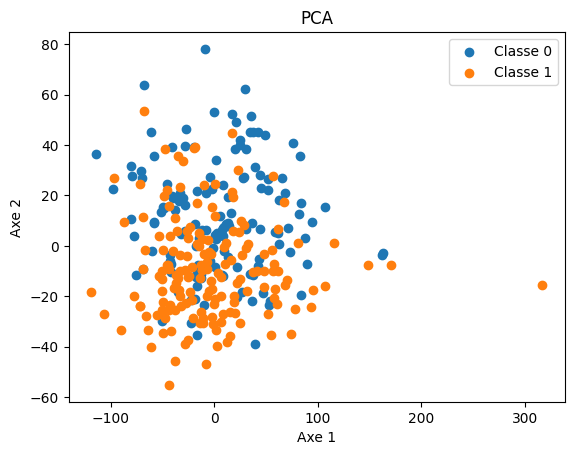

In [81]:
# PCA pour avoir 2 axes

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=["Axe 1", "Axe 2"])
# Get target
y = heart_attack["target"]
X_pca = pd.concat([X_pca, y], axis=1)


X_train_pca = pca.transform(X_train)
X_train_pca = pd.DataFrame(X_train_pca, columns=["Axe 1", "Axe 2"])
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=["Axe 1", "Axe 2"])

plt.scatter(X_pca[y == 0]["Axe 1"], X_pca[y == 0]["Axe 2"], label="Classe 0")
plt.scatter(X_pca[y == 1]["Axe 1"], X_pca[y == 1]["Axe 2"], label="Classe 1")
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("PCA")
plt.legend()
plt.show()


In [78]:
# Apprentissage d'un modèle d'analyse discriminante quadratique, d'analyse discriminante linéaire et de Bayes naïf gaussien

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()

qda.fit(X_train, y_train)
lda.fit(X_train, y_train)
nb.fit(X_train, y_train)

qda_pred = qda.predict(X_test)
lda_pred = lda.predict(X_test)
nb_pred = nb.predict(X_test)

print("QDA Accuracy: ", accuracy_score(y_test, qda_pred))
print("LDA Accuracy: ", accuracy_score(y_test, lda_pred))
print("NB Accuracy: ", accuracy_score(y_test, nb_pred))

print ("QDA ROC AUC :", cross_val_score(qda,X_train, y_train, cv=None, scoring='roc_auc').mean())
print ("LDA ROC AUC :", cross_val_score(lda,X_train, y_train, cv=None, scoring='roc_auc').mean())
print ("NB ROC AUC :", cross_val_score(nb,X_train, y_train, cv=None, scoring='roc_auc').mean())


QDA Accuracy:  0.7912087912087912
LDA Accuracy:  0.8021978021978022
NB Accuracy:  0.8351648351648352
QDA ROC AUC : 0.8699084668192218
LDA ROC AUC : 0.8992448512585811
NB ROC AUC : 0.8893135011441646


QDA Accuracy:  0.7252747252747253
LDA Accuracy:  0.7582417582417582
NB Accuracy:  0.7252747252747253
QDA ROC AUC : 0.7277116704805492
LDA ROC AUC : 0.7300915331807781
NB ROC AUC : 0.7299542334096111


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


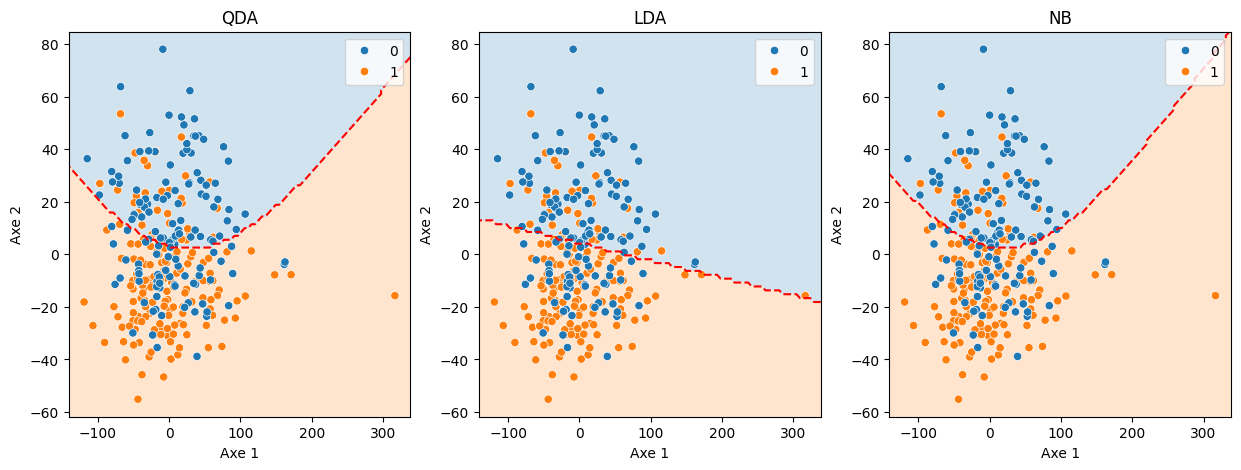

In [84]:
# Apprentissage d'un modèle d'analyse discriminante quadratique, d'analyse discriminante linéaire et de Bayes naïf gaussien

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from src.utils import add_decision_boundary

qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()

qda.fit(X_train_pca, y_train)
lda.fit(X_train_pca, y_train)
nb.fit(X_train_pca, y_train)

qda_pred = qda.predict(X_test_pca)
lda_pred = lda.predict(X_test_pca)
nb_pred = nb.predict(X_test_pca)

print("QDA Accuracy: ", accuracy_score(y_test, qda_pred))
print("LDA Accuracy: ", accuracy_score(y_test, lda_pred))
print("NB Accuracy: ", accuracy_score(y_test, nb_pred))

print ("QDA ROC AUC :", cross_val_score(qda,X_train_pca, y_train, cv=None, scoring='roc_auc').mean())
print ("LDA ROC AUC :", cross_val_score(lda,X_train_pca, y_train, cv=None, scoring='roc_auc').mean())
print ("NB ROC AUC :", cross_val_score(nb,X_train_pca, y_train, cv=None, scoring='roc_auc').mean())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sn.scatterplot(x="Axe 1", y="Axe 2", hue="target", data=X_pca)
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("QDA")
add_decision_boundary(qda)

plt.subplot(1, 3, 2)
sn.scatterplot(x="Axe 1", y="Axe 2", hue="target", data=X_pca)
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("LDA")
add_decision_boundary(lda)

plt.subplot(1, 3, 3)
sn.scatterplot(x="Axe 1", y="Axe 2", hue="target", data=X_pca)
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title("NB")
add_decision_boundary(nb)


### Arbre de décision

In [ ]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy:  0.7692307692307693


array([[32,  9],
       [12, 38]], dtype=int64)

In [ ]:
scores = cross_val_score(tree,X_train, y_train, cv=None, scoring='roc_auc')
scores1 = cross_val_score(tree,X_train, y_train, cv=None, scoring='recall')
print("Moyenne ROC AUC :", scores.mean(), "\nMoyenne recall :", scores1.mean())



Moyenne ROC AUC : 0.8380663615560643 
Moyenne recall : 0.8521739130434783


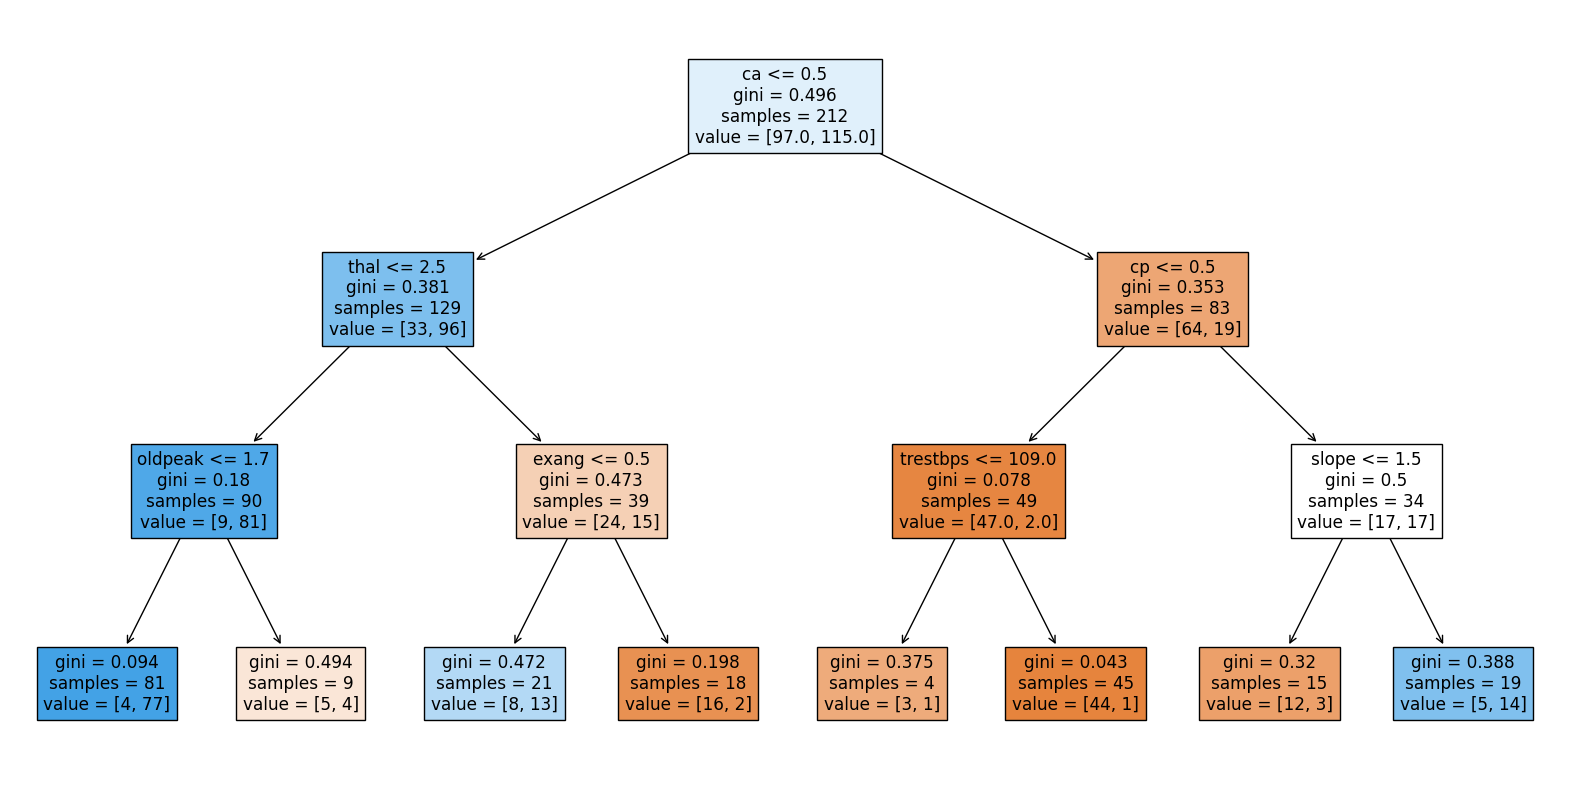

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=heart_attack.columns[:-1])
plt.show()

C:\Users\antoi\AppData\Local\Temp\ipykernel_2948\1256430655.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


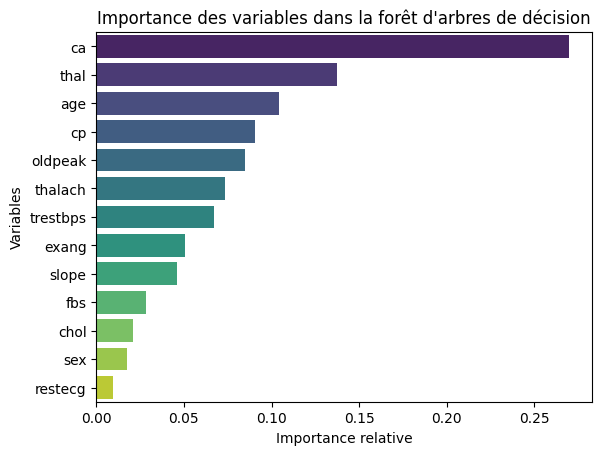

Accuracy :  0.7497231450719823
ROC :  0.7358810068649886


In [103]:
#  Graphique sur l'importance des variables dans l'arbre de décision

foret = DecisionTreeClassifier()
foret.fit(X_train, y_train)

importances = foret.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Importance des variables dans la forêt d'arbres de décision")
# En orientation horizontale, du plus important au moins important, en faisant un tri sur les indices
sn.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.xlabel("Importance relative")
plt.ylabel("Variables")
plt.show()

print("Accuracy : ", cross_val_score(foret, X_train, y_train, cv=None, scoring='accuracy').mean())
print("ROC : ", cross_val_score(foret, X_train, y_train, cv=None, scoring='roc_auc').mean())



## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8241758241758241


In [ ]:

scores = cross_val_score(rf,X_train, y_train, cv=None, scoring='roc_auc')
scores1 = cross_val_score(rf,X_train, y_train, cv=None, scoring='recall')
print("Moyenne ROC AUC :", scores.mean(), "\nMoyenne recall :", scores1.mean())


Moyenne ROC AUC : 0.8948169336384438 
Moyenne recall : 0.8173913043478261


<Axes: >

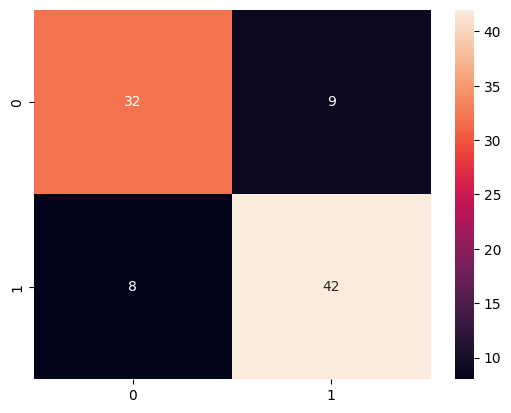

In [ ]:
# Matrice de confusion

sn.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
